<a href="https://colab.research.google.com/github/LyraGeyska/Artifical-Intellegent/blob/main/FuzzyLogic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuzzy Logic untuk Menentukan Tingkat Kecepatan Mobil

Sebuah sistem pintar ingin menentukan seberapa cepat sebuah mobil harus melaju berdasarkan dua input :

# Sistem Fuzzy untuk Menentukan Tingkat Kecepatan Mobil
Sebuah sistem pintar ingin menentukan seberapa cepat sebuah mobil harus melaju berdasarkan dua input:

```
# Kepadatan Lalu Lintas (Traffic Density) :
Rendah
Sedang
Tinggi
```

```
# Jarak ke Kendaraan Depan (Distance to Front Car)
Dekat
Sedang
Jauh
```

Output yang dihasilkan adalah

```
# kecepatan mobil (Speed Output) dengan kategori:
Lambat
Sedang
Cepat
 ```
Aturan Fuzzy (Fuzzy Rules):

```
Jika lalu lintas rendah dan jarak jauh, maka kecepatan cepat.
Jika lalu lintas sedang dan jarak sedang, maka kecepatan sedang.
Jika lalu lintas tinggi atau jarak dekat, maka kecepatan lambat.
Jika lalu lintas rendah tetapi jarak dekat, maka kecepatan sedang.
```

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.0 MB/s eta 0:00:00


Kecepatan yang disarankan: 36.26


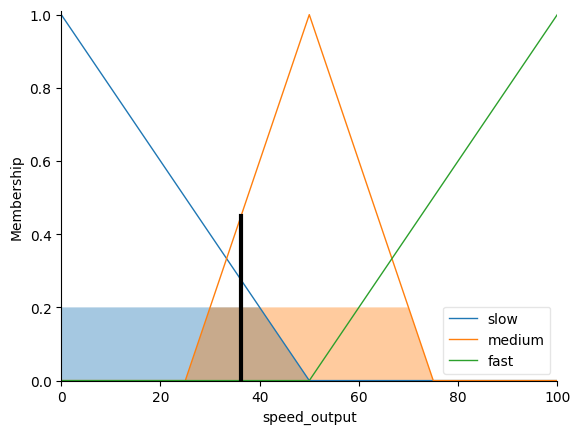

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# 1. Definisi Variabel Fuzzy
traffic_density = ctrl.Antecedent(np.arange(0, 101, 1), 'traffic_density')
distance_to_front_car = ctrl.Antecedent(np.arange(0, 101, 1), 'distance_to_front_car')
speed_output = ctrl.Consequent(np.arange(0, 101, 1), 'speed_output')

# 2. Definisi Fungsi Keanggotaan (Membershio Function)
traffic_density['low'] = fuzz.trimf(traffic_density.universe, [0, 0, 50])
traffic_density['medium'] = fuzz.trimf(traffic_density.universe, [25, 50, 75])
traffic_density['high'] = fuzz.trimf(traffic_density.universe, [50, 100, 100])

distance_to_front_car['close'] = fuzz.trimf(distance_to_front_car.universe, [0, 0, 50])
distance_to_front_car['medium'] = fuzz.trimf(distance_to_front_car.universe, [25, 50, 75])
distance_to_front_car['far'] = fuzz.trimf(distance_to_front_car.universe, [50, 100, 100])

speed_output['slow'] = fuzz.trimf(speed_output.universe, [0, 0, 50])
speed_output['medium'] = fuzz.trimf(speed_output.universe, [25, 50, 75])
speed_output['fast'] = fuzz.trimf(speed_output.universe, [50, 100, 100])

# 3. Definisi Aturan Fuzzy (Fuzzy Rules)
rule1 = ctrl.Rule(traffic_density['low'] & distance_to_front_car['far'], speed_output['fast'])
rule2 = ctrl.Rule(traffic_density['medium'] & distance_to_front_car['medium'], speed_output['medium'])
rule3 = ctrl.Rule(traffic_density['high'] | distance_to_front_car['close'], speed_output['slow'])
rule4 = ctrl.Rule(traffic_density['low'] & distance_to_front_car['close'], speed_output['medium'])

# 4. Membangun Sistem Kontrol Fuzzy
speed_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4])
speed_simulation = ctrl.ControlSystemSimulation(speed_control)

# 5. Input Nilai (Misalnya, Lalu Lintas 30% dan Jarak 40%)
speed_simulation.input['traffic_density'] = 30
speed_simulation.input['distance_to_front_car'] = 40

# 6. Simulasi Menjalankan Sistem Fuzzy
speed_simulation.compute()

# 7. Menampilkan Hasil
print(f"Kecepatan yang disarankan: {speed_simulation.output['speed_output']:.2f}")

# 8. Visualisasi
import matplotlib.pyplot as plt

speed_output.view(sim=speed_simulation)
plt.show()

# Sistem Fuzzy pada Mesin Cuci

# **Sistem fuzzy pada mesin cuci :**

Sistem fuzzy digunakan dalam mesin cuci untuk menentukan durasi pencucian (wash time) berdasarkan dua faktor utama:

Tingkat Kotoran Pakaian (Dirt Level)
* Rendah
* Sedang
* Tinggi

Jumlah Pakaian (Load Size)
* Sedikit
* Sedang
* Banyak

Output yang dihasilkan adalah Waktu Pencucian (Wash Time) dengan kategori:

* Pendek (Short)
* Sedang (Medium)
* Lama (Long)

Waktu pencucian yang disarankan: 42.33 menit


<function matplotlib.pyplot.show(close=None, block=None)>

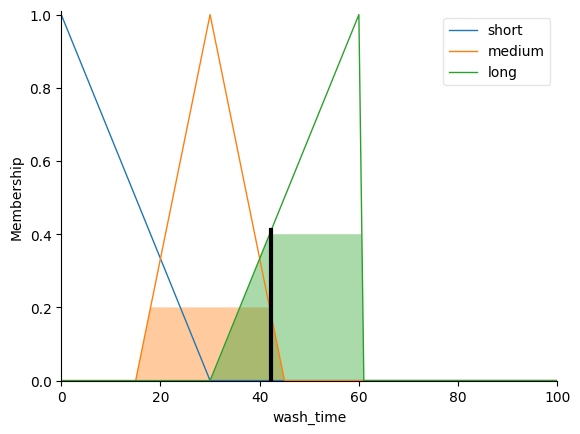

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# 1. Definisi Variabel Fuzzy
dirt_level = ctrl.Antecedent(np.arange(0, 101, 1), 'dirt_level')
load_size = ctrl.Antecedent(np.arange(0, 101, 1), 'load_size')
wash_time = ctrl.Consequent(np.arange(0, 101, 1), 'wash_time')

# 2. Definisi Fungsi Keanggotaan
dirt_level['low'] = fuzz.trimf(dirt_level.universe, [0, 0, 50])
dirt_level['medium'] = fuzz.trimf(dirt_level.universe, [25, 50, 75])
dirt_level['high'] = fuzz.trimf(dirt_level.universe, [50, 100, 100])

load_size['small'] = fuzz.trimf(load_size.universe, [0, 0, 50])
load_size['medium'] = fuzz.trimf(load_size.universe, [25, 50, 75])
load_size['large'] = fuzz.trimf(load_size.universe, [50, 100, 100])

wash_time['short'] = fuzz.trimf(wash_time.universe, [0, 0, 30])
wash_time['medium'] = fuzz.trimf(wash_time.universe, [15, 30, 45])
wash_time['long'] = fuzz.trimf(wash_time.universe, [30, 60, 60])

# 3. Definisi Aturan Fizzy
rule1 = ctrl.Rule(dirt_level['low'] & load_size['small'], wash_time['short'])
rule2 = ctrl.Rule(dirt_level['medium'] & load_size['medium'], wash_time['medium'])
rule3 = ctrl.Rule(dirt_level['high'] | load_size['large'], wash_time['long'])
rule4 = ctrl.Rule(dirt_level['low'] & load_size['large'], wash_time['medium'])
rule5 = ctrl.Rule(dirt_level['high'] & load_size['small'], wash_time['medium'])

# 4. Mmebangun Sistem Kontrol Fuzzy
wash_time_control = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
wash_time_simulation = ctrl.ControlSystemSimulation(wash_time_control)

# 5. Input Nilai (Misalnya, Kotoran 70% dan Jumlah Pakaiam 40%)
wash_time_simulation.input['dirt_level'] = 70
wash_time_simulation.input['load_size'] = 40

# 6. Simulasi Menjalankan Sistem Fuzzy
wash_time_simulation.compute()

# 7. Menampilkan Hasil
print(f"Waktu pencucian yang disarankan: {wash_time_simulation.output['wash_time']:.2f} menit")

# 8. Visualisasi Fungsi Keanggotaan
wash_time.view(sim= wash_time_simulation)
plt.show